# Creating a Linear Regression Model

## Setting up the environment

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import math
import statistics

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("Simple linear regression.csv")
x = df['SAT']
y = df['GPA']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)
avg_x = float(statistics.mean(x))
avg_y = float(statistics.mean(y))
len_x = len(x)
len_y = len(y)

## The basic math

#### Linear Regression is, put it simply, the line graph which best predicts the output given the input based of the pre-existing informations. As any other line graph, this can be presented as:
$$
Y = a + bX
$$
#### Where a is a fixed value, b is the slope of the function and X and Y are the input and output, respectely.

#### The key value of a Linear Regression is the slope, which can be manually resolved using this formula:

$$
b = r \cdot \frac{S_y}{S_x}
$$


#### Where r is the Pearson's Correlation Coeficient

$$
r = \frac{
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
}{
\sqrt{
\sum_{i=1}^{n} (x_i - \bar{x})^2
\sum_{i=1}^{n} (y_i - \bar{y})^2
}
}
$$


#### As a quick overview, you can interpret this formula in sections. 
#### The top part simply says "For each point on the table, substract the X value to the average X value, do the same with the Y value and multiply them". This part of the formula basically places the the point with the average X value as its X value and the average Y value as its Y value at the origin (0, 0). From there, we observe each data point's position: If it has a positive (previously above average) value of X and a positive Y value, the multiplication retuirns a bigger positive number and sums it to the rest. If the multiplication results in a negative number, this value would substract from the sum. After every value goes though this process, we would be left with a number (it can be positive or negative).

In [12]:
def top_part_Pearson_corr(x, y):
    total = 0
    for x, y in zip(x, y):
        result = (x - avg_x)*(y- avg_y)
        total += result
    return total
    

top_part_Pearson_corr(x, y)


1594.2919999999995

#### The bottom part of the Pearson's correlation coeficient is a bit more complicated
$$
r = \frac{
\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
}{
\sqrt{
\sum_{i=1}^{n} (x_i - \bar{x})^2
\sum_{i=1}^{n} (y_i - \bar{y})^2
}
}
$$
#### At the denominator we find the standard deviation of X multplied by the standard deviation of Y.
#### Standard deviation is, simply and brutely explain, how much does each value varies from the other and to the mean, meaning high standar deviation is that there is a huge spectrum of values, while a small standard deviation means most values are within a relatively shorter spectrum. 

#### The reason we use standard deviation in this case is because we don't take into account the magnitude of variables, me mean to measure the pure linear association. To explain it in a more intuitive manner, think that the numerator of Pearson's coeficient dictates how much X and Y move together, while the denominator tells you how much the move in general. So what you end up getting is the real relationship between the variables, discharding their magnitudes. So for example, if the standar deviation is small, a small change in magnitude could mean a large change in relationship. 

In [13]:
def bottom_part_Pearson_corr(x, y):
    subtotal_1 = 0
    subtotal_2 = 0
    for x, y in zip(x, y):
        subtotal_1+= math.pow((x-avg_x),2)
        subtotal_2+= math.pow((y-avg_y),2)
    result = math.sqrt(subtotal_1*subtotal_2)
    return result



bottom_part_Pearson_corr(x, y)

2602.7042156453363

In [14]:
def pearson_correlation(x, y):
    resultado = top_part_Pearson_corr(x, y)/bottom_part_Pearson_corr(x, y)
    return resultado

r = pearson_correlation(x, y)

### Now with the Pearson's correlation coefficient we can determine the slope of the linear regression using the previously explain formula:
$$
b = r \cdot \frac{S_y}{S_x}
$$


In [15]:
def slope_of_function(r, x, y):
    subtotal_x = 0
    subtotal_y = 0
    for x, y in zip(x, y):
        subtotal_x+= math.pow((x-avg_x),2)
        subtotal_y+= math.pow((y-avg_y),2)
    Sx = math.sqrt(subtotal_x/len_x)
    Sy = math.sqrt(subtotal_y/len_y)
    slope = r*(Sy/Sx)
    return slope

b = slope_of_function(r, x, y)

### A key concept of Linear Regression is that this "line graph" ALWAYS intercepts a point formed by the average values of X and the average values of Y. With that information, we can finalize the graph with a simple:
$$
\bar{y} = a + b\bar{x}
$$


In [18]:
def y_intercept(slope, avg_x, avg_y):
    result = avg_y - (avg_x*slope)
    return result

a = y_intercept(b, avg_x, avg_y)

### Now we have all the elements to make predictions, so let's test the Linear Regression Model

In [19]:
def prediction(x_test, slope, y_intercept):
    predictions = []
    for x in x_test:
        predict = y_intercept + (slope * x)
        predictions.append(predict)
    return predictions

predictions = prediction(x_test, b, a)

### Now, we are only left with cheking the results

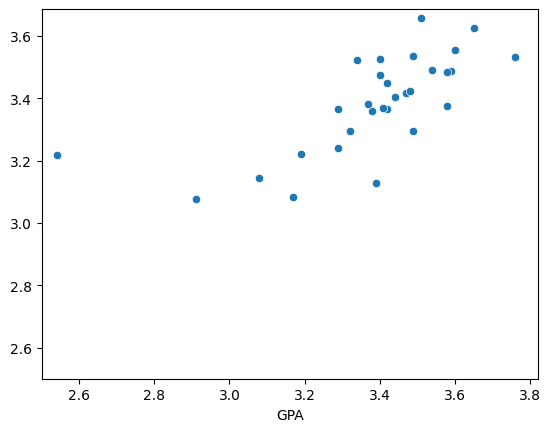

In [24]:
sns.scatterplot(x = y_test, y = predictions)
plt.xlim(left=2.5)
plt.ylim(bottom=2.5)

plt.show()

### Here we can faintly see that the mayority of points form a 45 degree line graph, but lets check it further

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
print(f'Mean Absolute Error: {mean_absolute_error(y_test, predictions)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, predictions)}')
print(f'RMSE: {math.sqrt(mean_squared_error(y_test, predictions))}')

Mean Absolute Error: 0.10860174358069684
Mean Squared Error: 0.027516385326761275
RMSE: 0.16588063577995255


### Now finally, any good lineal regression model has to take a look into the distributions of its residuals, which are the difference (positive or negative) between the predictions and the real values and the distribution of said values

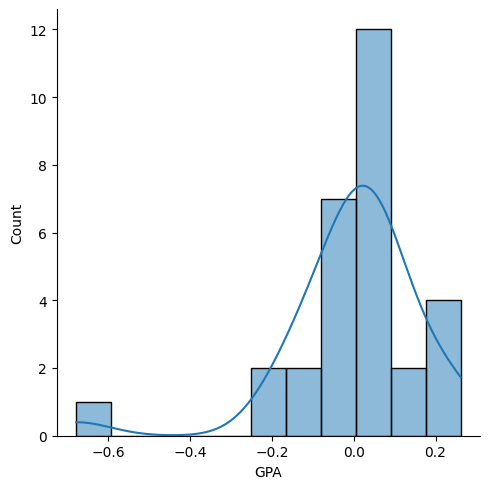

In [30]:
residuals = y_test - predictions
sns.displot(residuals, kde = True)


#### We can see that the distribution of error is similar to the normal distribution, being values close to cero the most frequently appearing. Nevertheless, it is true that the sample dataset is rather small, so outliers might skew a bit the visuals